# Linear Regression Problem 03

### Predicting Employee Salaries Based on Experience, Education, and Job Level

**Step 1: Import Libraries and Generate Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate a synthetic dataset
np.random.seed(42)

n_samples = 150
experience = np.random.randint(1, 30, n_samples)               # Years of experience (1 to 30 years)
education_level = np.random.randint(1, 5, n_samples)            # Education level (1 to 4: High School to PhD)
job_level = np.random.randint(1, 4, n_samples)                  # Job level (1 to 3: Junior to Senior)

# Creating salary with some random noise to make it realistic
salary = (experience * 3) + (education_level * 10) + (job_level * 15) + np.random.randint(20000, 80000, n_samples)

# Creating a DataFrame
df = pd.DataFrame({
    'Experience': experience,
    'EducationLevel': education_level,
    'JobLevel': job_level,
    'Salary': salary / 1000  # Salary in thousands
})

# Check the first few rows of the dataset
print(df.head())


   Experience  EducationLevel  JobLevel  Salary
0           7               2         3  32.619
1          20               1         3  60.226
2          29               4         1  60.116
3          15               3         3  74.868
4          11               3         2  25.894


**Step 2: Explore the Data**

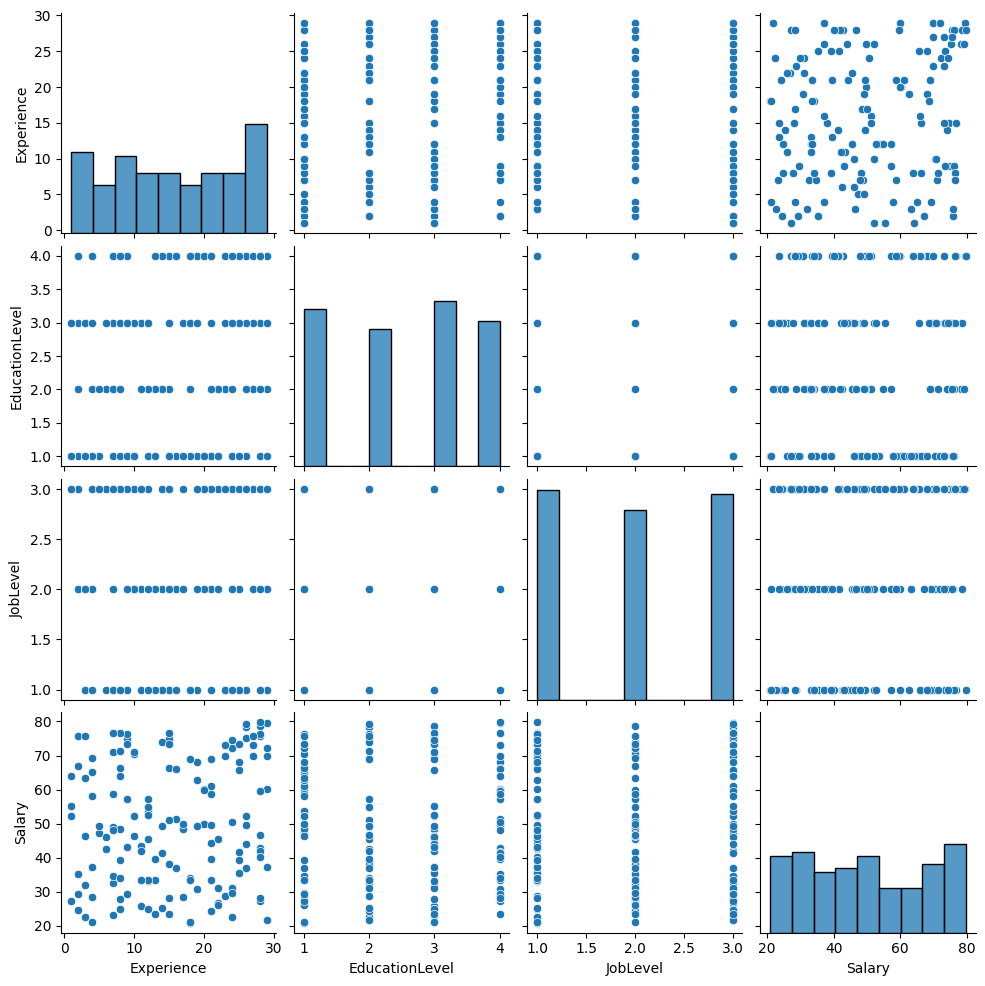

                Experience  EducationLevel  JobLevel    Salary
Experience        1.000000        0.097910 -0.117393  0.127511
EducationLevel    0.097910        1.000000 -0.068412  0.006031
JobLevel         -0.117393       -0.068412  1.000000 -0.020195
Salary            0.127511        0.006031 -0.020195  1.000000


In [4]:
# Explore the data
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

# Correlation matrix to see how variables are related
print(df.corr())

**Step 3: Prepare the Data**

In [5]:
# Step 3: Prepare the data for model training
X = df[['Experience', 'EducationLevel', 'JobLevel']]  # Features
y = df['Salary']  # Target variable (Salary)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4: Train the Linear Regression Model**

In [6]:
# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.30190783 1.07393505 1.06057473]
Intercept: 40.132306105663396


**Step 5: Evaluate the Model**

In [7]:
# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

Mean Squared Error: 334.72578847302526
R-squared Score: -0.07990056899005382


**Step 6: Visualize the Results**

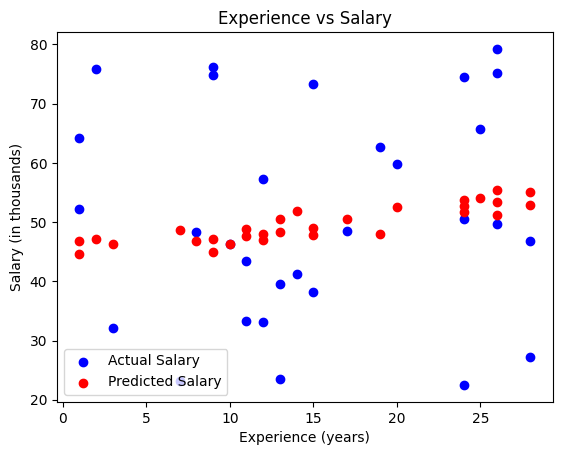

In [8]:
# Step 6: Visualize the relationship between experience and salary
plt.scatter(X_test['Experience'], y_test, color='blue', label='Actual Salary')
plt.scatter(X_test['Experience'], y_pred, color='red', label='Predicted Salary')

plt.title('Experience vs Salary')
plt.xlabel('Experience (years)')
plt.ylabel('Salary (in thousands)')
plt.legend()
plt.show()

The model can predict employee salaries based on experience, education level, and job level. If the model’s R-squared score is high (close to 1), it means that these factors explain most of the variance in salaries.